## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quiz_utils import *
import base64

## Offline implementation of Disk Scheduling algorithms

In [2]:
def argmin(x):
    return min(range(len(x)), key= lambda i: x[i] )

def sstf(start, track_numbers,disk_size=None):
    """Shortest Seek Time First Disk Scheduler"""
    scheduled = []
    track_numbers = track_numbers.copy()
    while track_numbers:
        distance = [abs(start-x) for x in track_numbers]
        near_i = argmin(distance)
        scheduled.append(track_numbers.pop(near_i))
        start = scheduled[-1]
    return scheduled

    
def scan(start, track_numbers, disk_size=None):
    """SCAN Disk Scheduler"""
    track_numbers = sorted(track_numbers)
    distance = [abs(start-x) for x in track_numbers]
    near_i = argmin(distance)
    direction = (track_numbers[near_i]-start)
    if direction<0:
        return list(reversed(track_numbers[:near_i+1]))+[0]+track_numbers[near_i+1:]+[disk_size]
    else:
        return track_numbers[near_i:]+[disk_size]+list(reversed(track_numbers[:near_i]))+[0]

def c_scan(start, track_numbers, disk_size=None):
    """C-SCAN Disk Scheduler"""
    track_numbers = sorted(track_numbers)
    distance = [abs(start-x) for x in track_numbers]
    near_i = argmin(distance)
    direction = (track_numbers[near_i]-start)
    if direction<0:
        return list(reversed(track_numbers[:near_i+1]))+[0]+[None]+[disk_size]+list(reversed(track_numbers[near_i+1:]))
    else:
        return track_numbers[near_i:]+[disk_size]+[None]+[0]+track_numbers[:near_i]

def c_look(start, track_numbers, disk_size=None):
    """C-LOOK Disk Scheduler"""
    track_numbers = sorted(track_numbers)
    distance = [abs(start-x) for x in track_numbers]
    near_i = argmin(distance)
    direction = (track_numbers[near_i]-start)
    if direction<0:
        return list(reversed(track_numbers[:near_i+1]))+[None]+list(reversed(track_numbers[near_i+1:]))
    else:
        return track_numbers[near_i:]+[None]+track_numbers[:near_i]
    

In [3]:

def split_list(l, delimeter=None):
    splits = []
    split = []
    l = l.copy()
    if l[-1] is not None:
        l += [None]
    for item in l:
        if item is None:
            splits.append(split)
            split=[]
        else:
            split.append(item)
    return splits

def total_head_movements(start, track_numbers, scheduler=None,disk_size=None):
    if scheduler:
        scheduled_track_numbers = scheduler(start, track_numbers,disk_size=disk_size)
    else:
        scheduled_track_numbers = track_numbers

    distance = 0
    for split in split_list([start]+scheduled_track_numbers):
        distance += np.sum(np.abs(np.diff(split)))
    return distance

def scheduling_plot(start, track_numbers, scheduler=None,disk_size=None,speed=10,message=""):
    if scheduler:
        scheduled_track_numbers = scheduler(start, track_numbers,disk_size=disk_size)
    else:
        scheduled_track_numbers = track_numbers
    
    start_d = 0 
    for split in split_list([start]+scheduled_track_numbers):
        distance = np.cumsum([0]+np.abs(np.diff(split)).tolist())
        time = (distance+start_d)/speed
        start_d = distance[-1]
        plt.plot(split,time,"C0-o")
    if message:
        plt.title(message)
    plt.xlim(0,disk_size)
    plt.xticks([start]+[x for x in scheduled_track_numbers if x is not None])
    plt.gca().invert_yaxis()
    plt.grid(axis="both")
    plt.xlabel("track number")
    plt.ylabel("time")

def plot_scheduling_grid(start, track_numbers, schedulers, disk_size):
    plt.figure(figsize=(8,8))
    plt.suptitle(f"start: {start}, track numbers: {track_numbers}")
    for i, scheduler in enumerate(schedulers):
        plt.subplot(2,2,i+1)
        scheduling_plot(start,track_numbers,scheduler, disk_size,message=f"({i+1})")
    plt.tight_layout()
    plt.show()

def generate_total_head_movement_question(n_requests, disk_size):
    start, *track_numbers  = np.random.choice(disk_size,n_requests,replace=False)
    schedulers = [None,sstf,scan,c_scan,c_look]
    scheduler = np.random.choice(schedulers)
    sched_name = "FCFS" if scheduler is None else scheduler.__name__.replace("_","-").upper() 

    print(
f"""Consider the below case in which the requests are serviced by {sched_name} disk scheduling algorithm.
Start: {start}, tracks requested: {track_numbers}.
Find the total number of head movements required to service all the requests using the {sched_name} algorithm."""
    )
    answer = total_head_movements(start, track_numbers, scheduler, disk_size)
    plt.figure(figsize=(4,4))
    scheduling_plot(start, track_numbers, scheduler,disk_size)
    plt.savefig("plt.png")
    plt.close()
    with open("plt.png", "rb")  as f:
        encoded_string = base64.encodebytes(f.read()).decode("utf-8")
    img = f'<img src="data:image/png;base64, {encoded_string}"></img>'
    display(HTML(collapsible(f"<p>Answer: {answer}</p> {img}")))

def generate_scheduling_plot_question(n_requests, disk_size):
    start, *track_numbers  = np.random.choice(disk_size,n_requests,replace=False)
    schedulers = [None,sstf,scan,c_scan,c_look]
    schedulers = np.random.choice(schedulers,4,replace=False).tolist()
    sched_names = ["FCFS" if s is None else s.__name__.replace("_","-").upper() for s in schedulers]

    print("Consider the below plots representing the order in which the requests are serviced by different disk scheduling algorithms.")
    plot_scheduling_grid(start, track_numbers, schedulers, disk_size)
    print(f"Select the correct option from the below.")
    options, correct_option = generate_shuffled_match_options(sched_names)
    display_match_options(options, correct_option)
    


Consider the below plots representing the order in which the requests are serviced by different disk scheduling algorithms.


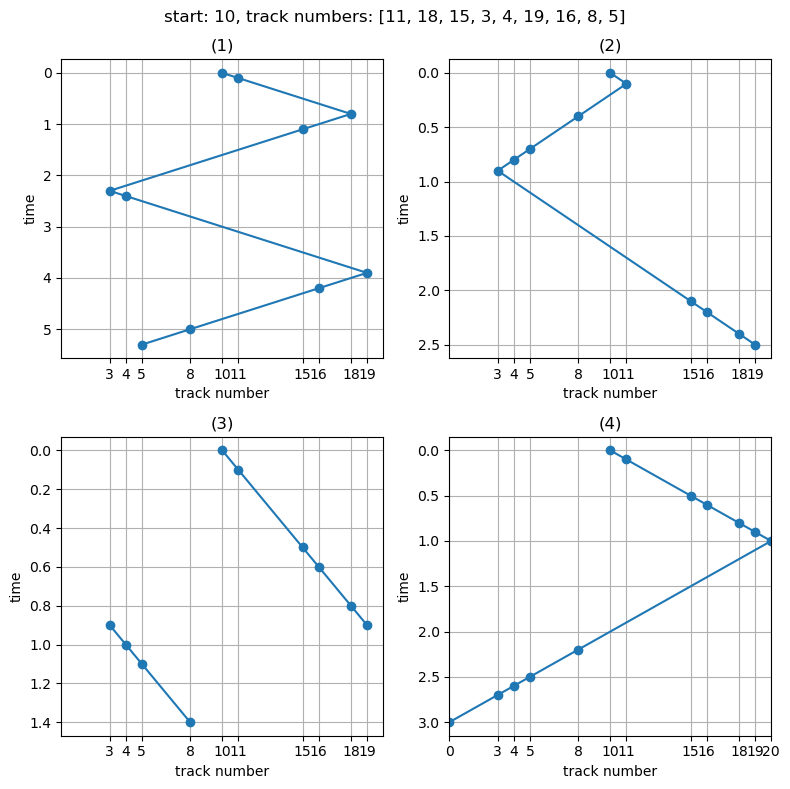

Select the correct option from the below.


In [4]:
# np.random.seed(3) # fix the seed if needed
n_requests = 10
disk_size = 20
generate_scheduling_plot_question(n_requests,disk_size)

In [14]:
n_requests = 10
disk_size = 20
generate_total_head_movement_question(n_requests,disk_size)

Consider the below case in which the requests are serviced by C-SCAN disk scheduling algorithm.
Start: 12, tracks requested: [11, 0, 3, 4, 14, 8, 17, 9, 1].
Find the total number of head movements required to service all the requests using the C-SCAN algorithm.
